In [2]:
# importing the libraries
import pandas as pd
import numpy as np

In [3]:
# reading the file
data = pd.read_csv('datasets\high_correlation_fllter.csv')

In [4]:
# first 5 rows of the data
data.head()

,ID,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,AB101,1,0,0,1,9.84,14.395,81,0.0,16
1,AB102,1,0,0,1,9.02,13.635,80,0.0,40
2,AB103,1,0,0,1,9.02,13.635,80,0.0,32
3,AB104,1,0,0,1,9.84,14.395,75,0.0,13
4,AB105,1,0,0,1,9.84,14.395,75,0.0,1


In [5]:
# shape of the data
data.shape

(12980, 10)

In [6]:
# number of missing values in each variable
data.isnull().sum()

ID            0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64

In [7]:
# dropping the targer variable
df = data.drop('count',axis=1)

In [8]:
# calculalting the correlation between independent variables
df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
season,1.000000,-0.010959,0.014343,-0.013005,0.394560,0.397765,0.181712,-0.135762
holiday,-0.010959,1.000000,-0.248558,-0.018406,-0.025104,-0.032903,-0.029520,0.021646
workingday,0.014343,-0.248558,1.000000,0.052788,0.060589,0.064840,0.028026,0.001986
weather,-0.013005,-0.018406,0.052788,1.000000,-0.093655,-0.094877,0.432497,0.011120
temp,0.394560,-0.025104,0.060589,-0.093655,1.000000,0.991839,-0.048478,-0.008669
atemp,0.397765,-0.032903,0.064840,-0.094877,0.991839,1.000000,-0.031606,-0.049997
humidity,0.181712,-0.029520,0.028026,0.432497,-0.048478,-0.031606,1.000000,-0.296975
windspeed,-0.135762,0.021646,0.001986,0.011120,-0.008669,-0.049997,-0.296975,1.000000


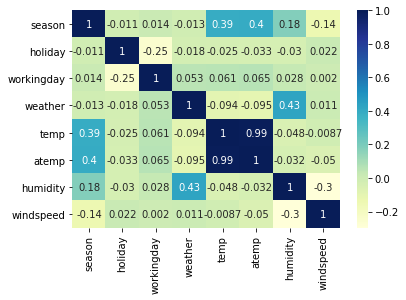

In [9]:
import seaborn as sb

  
# plotting correlation heatmap
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [10]:
# creating correlation matrix
corr_matrix = df.corr().abs()

In [11]:
corr_matrix

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
season,1.000000,0.010959,0.014343,0.013005,0.394560,0.397765,0.181712,0.135762
holiday,0.010959,1.000000,0.248558,0.018406,0.025104,0.032903,0.029520,0.021646
workingday,0.014343,0.248558,1.000000,0.052788,0.060589,0.064840,0.028026,0.001986
weather,0.013005,0.018406,0.052788,1.000000,0.093655,0.094877,0.432497,0.011120
temp,0.394560,0.025104,0.060589,0.093655,1.000000,0.991839,0.048478,0.008669
atemp,0.397765,0.032903,0.064840,0.094877,0.991839,1.000000,0.031606,0.049997
humidity,0.181712,0.029520,0.028026,0.432497,0.048478,0.031606,1.000000,0.296975
windspeed,0.135762,0.021646,0.001986,0.011120,0.008669,0.049997,0.296975,1.000000


In [12]:
# selecting upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [13]:
upper

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
season,NaN,0.010959,0.014343,0.013005,0.394560,0.397765,0.181712,0.135762
holiday,NaN,NaN,0.248558,0.018406,0.025104,0.032903,0.029520,0.021646
workingday,NaN,NaN,NaN,0.052788,0.060589,0.064840,0.028026,0.001986
weather,NaN,NaN,NaN,NaN,0.093655,0.094877,0.432497,0.011120
temp,NaN,NaN,NaN,NaN,NaN,0.991839,0.048478,0.008669
atemp,NaN,NaN,NaN,NaN,NaN,NaN,0.031606,0.049997
humidity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.296975
windspeed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# selecting upper triangle of correlation matrix
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [15]:
lower

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
season,1.000000,0.010959,NaN,NaN,NaN,NaN,NaN,NaN
holiday,0.010959,1.000000,0.248558,NaN,NaN,NaN,NaN,NaN
workingday,0.014343,0.248558,1.000000,0.052788,NaN,NaN,NaN,NaN
weather,0.013005,0.018406,0.052788,1.000000,0.093655,NaN,NaN,NaN
temp,0.394560,0.025104,0.060589,0.093655,1.000000,0.991839,NaN,NaN
atemp,0.397765,0.032903,0.064840,0.094877,0.991839,1.000000,0.031606,NaN
humidity,0.181712,0.029520,0.028026,0.432497,0.048478,0.031606,1.000000,0.296975
windspeed,0.135762,0.021646,0.001986,0.011120,0.008669,0.049997,0.296975,1.000000


In [16]:
upper.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed'],
      dtype='object')

In [17]:
lower.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed'],
      dtype='object')

In [18]:
# finding index of variables with correlation greater than 0.6
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]

In [19]:
to_drop

['atemp']

In [20]:
# dropping the variable and creating new dataset
new_data = data.drop(data[to_drop], axis=1)

In [21]:
# first five rows of the new data
new_data.head()

,ID,season,holiday,workingday,weather,temp,humidity,windspeed,count
0,AB101,1,0,0,1,9.84,81,0.0,16
1,AB102,1,0,0,1,9.02,80,0.0,40
2,AB103,1,0,0,1,9.02,80,0.0,32
3,AB104,1,0,0,1,9.84,75,0.0,13
4,AB105,1,0,0,1,9.84,75,0.0,1


In [22]:
# shape of new and original data
new_data.shape, data.shape

((12980, 9), (12980, 10))

In [24]:
# Open database
df = pd.read_excel('datasets\Student Applications & Performance.xlsx', sheet_name = 'University information',engine = 'openpyxl')

In [25]:
df.head(10)

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,NaN,1150.0,...,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,26.0,NaN,...,B,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,NaN,1020.0,...,B,Bachelors,15,15,14.0,14.0,0,0,0,0.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,NaN,1210.0,...,B,Bachelors,13,13,14.0,14.0,0,0,0,0.0
4,7962680,18,F,BGD 1,Y,N,Art,N,NaN,1200.0,...,B,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0
5,7815697,18,M,BGD 1,Y,N,Political Science,N,NaN,1050.0,...,B,Bachelors,15,15,16.0,16.0,0,0,0,0.0
6,7838856,18,F,BGD 1,Y,N,Biology,N,NaN,580.0,...,B,Bachelors,16,16,15.0,15.0,0,0,0,0.0
7,7960448,18,F,BGD 1,Y,N,Biology,N,NaN,750.0,...,B,Bachelors,16,16,15.0,15.0,0,0,0,0.0
8,7944779,18,F,BGD 3,Y,N,Accounting,N,NaN,1060.0,...,B,Bachelors,16,16,15.0,15.0,0,0,0,0.0
9,7902044,18,F,BGD 1,Y,N,Undeclared,N,NaN,NaN,...,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0


In [26]:
df.shape

(3400, 56)

In [36]:
df.select_dtypes('int64')

,STUDENT IDENTIFIER,STDNT_AGE,FIRST_TERM,SECOND_TERM,RETURNED_2ND_YR,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION
0,7808615,18,200708,200802,0,16,16,0,0,0
1,7830063,19,200808,200902,1,18,18,570000,1355760,785760
2,7847538,18,201008,201102,1,15,15,0,0,0
3,8006429,18,200708,200802,1,13,13,0,0,0
4,7962680,18,200808,200902,1,12,12,835920,1355760,519840
...,...,...,...,...,...,...,...,...,...,...
3395,7948112,18,200808,200902,0,18,18,0,0,0
3396,8023055,18,200708,200802,0,13,9,0,0,0
3397,7926915,18,200808,200902,0,14,6,0,945840,1288980
3398,7877332,18,201008,201102,1,12,9,0,269100,0


In [32]:
df01 = df.drop('RETURNED_2ND_YR',axis=1)

In [33]:
df01

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,NaN,1150.0,...,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,26.0,NaN,...,B,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,NaN,1020.0,...,B,Bachelors,15,15,14.0,14.0,0,0,0,0.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,NaN,1210.0,...,B,Bachelors,13,13,14.0,14.0,0,0,0,0.0
4,7962680,18,F,BGD 1,Y,N,Art,N,NaN,1200.0,...,B,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,7948112,18,F,BGD 4,N,N,Music Performance,N,NaN,800.0,...,B,Bachelors,18,18,16.0,13.0,0,0,0,0.0
3396,8023055,18,F,BGD 1,Y,N,Biology,N,20.0,NaN,...,B,Bachelors,13,9,NaN,NaN,0,0,0,0.0
3397,7926915,18,F,BGD 4,Y,N,Biology,N,NaN,1020.0,...,B,Bachelors,14,6,NaN,NaN,0,945840,1288980,0.0
3398,7877332,18,F,BGD 3,Y,N,Joint Enrollment - Accel,N,21.0,NaN,...,B,Bachelors,12,9,NaN,NaN,0,269100,0,-231720.0


In [34]:
df01.corr()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,SECOND_TERM,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_CD,MOTHER_HI_EDU_CD,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
STUDENT IDENTIFIER,1.000000,0.014121,-0.052514,-0.021449,-0.028983,-0.020793,-0.020793,0.008190,0.001779,-0.002063,-0.000607,0.003202,-0.001546,0.023423,0.020957,-0.011625,-0.006876,0.005904,0.003060
STDNT_AGE,0.014121,1.000000,0.029373,0.000361,-0.003127,0.022195,0.022195,-0.014943,-0.077034,0.006087,-0.026697,-0.008669,-0.008370,-0.044454,-0.039349,-0.019583,-0.031554,-0.020876,-0.015866
STDNT_TEST_ENTRANCE1,-0.052514,0.029373,1.000000,0.560399,0.999567,0.007782,0.007782,0.050380,0.308255,0.027167,0.022168,0.129741,0.292449,0.079316,0.209124,-0.105342,-0.046800,0.053471,-0.076765
STDNT_TEST_ENTRANCE2,-0.021449,0.000361,0.560399,1.000000,0.877460,0.036608,0.036608,0.029455,0.198214,-0.001224,-0.002925,0.050081,0.127408,0.020820,0.119129,-0.064244,-0.012746,0.062944,-0.077139
STDNT_TEST_ENTRANCE_COMB,-0.028983,-0.003127,0.999567,0.877460,1.000000,0.018554,0.018554,0.031361,0.210936,0.031522,0.016755,0.070579,0.180002,0.046617,0.133601,-0.078801,-0.029479,0.053822,-0.078304
FIRST_TERM,-0.020793,0.022195,0.007782,0.036608,0.018554,1.000000,1.000000,0.035961,-0.009511,0.001117,0.023050,0.026068,-0.060150,0.062327,0.003712,-0.027201,-0.069077,-0.045099,-0.060635
SECOND_TERM,-0.020793,0.022195,0.007782,0.036608,0.018554,1.000000,1.000000,0.035961,-0.009511,0.001117,0.023050,0.026068,-0.060150,0.062327,0.003712,-0.027201,-0.069077,-0.045099,-0.060635
DISTANCE_FROM_HOME,0.008190,-0.014943,0.050380,0.029455,0.031361,0.035961,0.035961,1.000000,-0.021993,0.025465,0.036002,0.068315,0.046353,0.076342,0.067911,-0.021969,-0.001447,0.045091,-0.002795
HIGH_SCHL_GPA,0.001779,-0.077034,0.308255,0.198214,0.210936,-0.009511,-0.009511,-0.021993,1.000000,-0.014789,0.001204,0.074081,0.326504,0.096340,0.311702,-0.011107,0.003108,0.009516,-0.108911
FATHER_HI_EDU_CD,-0.002063,0.006087,0.027167,-0.001224,0.031522,0.001117,0.001117,0.025465,-0.014789,1.000000,0.293005,0.054515,0.020965,0.024111,0.015456,-0.083476,-0.014629,0.064919,-0.080810


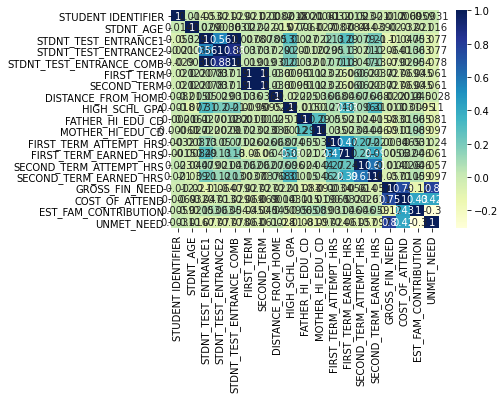

In [37]:
import seaborn as sb

  
# plotting correlation heatmap
dataplot = sb.heatmap(df01.corr(), cmap="YlGnBu", annot=True)

In [38]:
# creating correlation matrix
corr_matrix = df01.corr().abs()

In [39]:
corr_matrix

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,SECOND_TERM,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_CD,MOTHER_HI_EDU_CD,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
STUDENT IDENTIFIER,1.000000,0.014121,0.052514,0.021449,0.028983,0.020793,0.020793,0.008190,0.001779,0.002063,0.000607,0.003202,0.001546,0.023423,0.020957,0.011625,0.006876,0.005904,0.003060
STDNT_AGE,0.014121,1.000000,0.029373,0.000361,0.003127,0.022195,0.022195,0.014943,0.077034,0.006087,0.026697,0.008669,0.008370,0.044454,0.039349,0.019583,0.031554,0.020876,0.015866
STDNT_TEST_ENTRANCE1,0.052514,0.029373,1.000000,0.560399,0.999567,0.007782,0.007782,0.050380,0.308255,0.027167,0.022168,0.129741,0.292449,0.079316,0.209124,0.105342,0.046800,0.053471,0.076765
STDNT_TEST_ENTRANCE2,0.021449,0.000361,0.560399,1.000000,0.877460,0.036608,0.036608,0.029455,0.198214,0.001224,0.002925,0.050081,0.127408,0.020820,0.119129,0.064244,0.012746,0.062944,0.077139
STDNT_TEST_ENTRANCE_COMB,0.028983,0.003127,0.999567,0.877460,1.000000,0.018554,0.018554,0.031361,0.210936,0.031522,0.016755,0.070579,0.180002,0.046617,0.133601,0.078801,0.029479,0.053822,0.078304
FIRST_TERM,0.020793,0.022195,0.007782,0.036608,0.018554,1.000000,1.000000,0.035961,0.009511,0.001117,0.023050,0.026068,0.060150,0.062327,0.003712,0.027201,0.069077,0.045099,0.060635
SECOND_TERM,0.020793,0.022195,0.007782,0.036608,0.018554,1.000000,1.000000,0.035961,0.009511,0.001117,0.023050,0.026068,0.060150,0.062327,0.003712,0.027201,0.069077,0.045099,0.060635
DISTANCE_FROM_HOME,0.008190,0.014943,0.050380,0.029455,0.031361,0.035961,0.035961,1.000000,0.021993,0.025465,0.036002,0.068315,0.046353,0.076342,0.067911,0.021969,0.001447,0.045091,0.002795
HIGH_SCHL_GPA,0.001779,0.077034,0.308255,0.198214,0.210936,0.009511,0.009511,0.021993,1.000000,0.014789,0.001204,0.074081,0.326504,0.096340,0.311702,0.011107,0.003108,0.009516,0.108911
FATHER_HI_EDU_CD,0.002063,0.006087,0.027167,0.001224,0.031522,0.001117,0.001117,0.025465,0.014789,1.000000,0.293005,0.054515,0.020965,0.024111,0.015456,0.083476,0.014629,0.064919,0.080810


In [40]:
# selecting upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [41]:
upper

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,SECOND_TERM,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_CD,MOTHER_HI_EDU_CD,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
STUDENT IDENTIFIER,NaN,0.014121,0.052514,0.021449,0.028983,0.020793,0.020793,0.008190,0.001779,0.002063,0.000607,0.003202,0.001546,0.023423,0.020957,0.011625,0.006876,0.005904,0.003060
STDNT_AGE,NaN,NaN,0.029373,0.000361,0.003127,0.022195,0.022195,0.014943,0.077034,0.006087,0.026697,0.008669,0.008370,0.044454,0.039349,0.019583,0.031554,0.020876,0.015866
STDNT_TEST_ENTRANCE1,NaN,NaN,NaN,0.560399,0.999567,0.007782,0.007782,0.050380,0.308255,0.027167,0.022168,0.129741,0.292449,0.079316,0.209124,0.105342,0.046800,0.053471,0.076765
STDNT_TEST_ENTRANCE2,NaN,NaN,NaN,NaN,0.877460,0.036608,0.036608,0.029455,0.198214,0.001224,0.002925,0.050081,0.127408,0.020820,0.119129,0.064244,0.012746,0.062944,0.077139
STDNT_TEST_ENTRANCE_COMB,NaN,NaN,NaN,NaN,NaN,0.018554,0.018554,0.031361,0.210936,0.031522,0.016755,0.070579,0.180002,0.046617,0.133601,0.078801,0.029479,0.053822,0.078304
FIRST_TERM,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.035961,0.009511,0.001117,0.023050,0.026068,0.060150,0.062327,0.003712,0.027201,0.069077,0.045099,0.060635
SECOND_TERM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.035961,0.009511,0.001117,0.023050,0.026068,0.060150,0.062327,0.003712,0.027201,0.069077,0.045099,0.060635
DISTANCE_FROM_HOME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021993,0.025465,0.036002,0.068315,0.046353,0.076342,0.067911,0.021969,0.001447,0.045091,0.002795
HIGH_SCHL_GPA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014789,0.001204,0.074081,0.326504,0.096340,0.311702,0.011107,0.003108,0.009516,0.108911
FATHER_HI_EDU_CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.293005,0.054515,0.020965,0.024111,0.015456,0.083476,0.014629,0.064919,0.080810


In [42]:
# finding index of variables with correlation greater than 0.6
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]

In [43]:
to_drop

['STDNT_TEST_ENTRANCE_COMB',
 'SECOND_TERM',
 'SECOND_TERM_EARNED_HRS',
 'COST_OF_ATTEND',
 'UNMET_NEED']

In [46]:
# dropping the variable and creating new dataset
new_data = df.drop(df[to_drop], axis=1)

In [47]:
new_data.shape

(3400, 51)

In [48]:
df.shape

(3400, 56)